# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 1. Нейронные сети.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 60 баллов
* **Остальные задачи будут выложены в части 2 с отдельным дедлайном.**

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad4_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [15]:
from typing import Tuple
import numpy as np
import torch
from torchvision import transforms
from torchvision.datasets import MNIST
from torch import nn as nn
from torch import optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import time

sns.set(palette="Set2")
# Определяем девайс, на котором будем считать (помните, что для cuda в colab нужно включить соответствующий режим)
device = torch.device(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
#device = 'cpu'
if device == 'cpu' or device == torch.device('cpu'):
  print('')
else:
    n_gpu = torch.cuda.device_count()

# Допишите сюда необходимые импорты

---
### <font color="blue"><i>Легкая часть</i></font>

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 1.

**При решении данной задачи можно использовать ИИ-инструменты только для построения графиков и оформления документаций к коду.**

Обратимся вновь к уже знакомому нам <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">по первому занятию</a> датасету **MNIST**. Как вы помните, этот набор данных содержит изображения рукописных цифр, каждое из которых имеет размер **28x28**. Всего в датасете содержится **60 000** изображений в обучающей выборке и еще **10 000** — в тестовой.

На первом занятии мы работали с сокращенной версией этого датасета, содержащей **1797** изображений размером **8x8**.

В этой домашней работе мы выберем более "сложный" вариант, а именно:

* вернемся к исходной версии датасета с изображениями размером **28x28**,
* сожмем изображения в два раза по каждой из размерностей, то есть до **14x14**,
* оставим **10 000** изображений в обучающей выборке.

> *Примечание.* При желании вы можете усложнить задачу &mdash; отказаться от сжатия изображений и/или увеличить количество данных. Однако учтите, что в таком случае модели будут работать дольше, и, возможно, вам будет сложнее достичь желаемых результатов.

**Наша задача остается прежней:** *по изображению определить, какая цифра на нем нарисована.*
На этот раз мы будем решать ее с помощью простых нейронных сетей. Также мы заглянем "под капот" нейросетей, чтобы лучше понять процесс их обучения.

> *Примечание.* Обычно подобные задачи, связанные с изображениями, решаются с помощью сверточных нейронных сетей, которые лучше подходят для работы с изображениями. Они станут темой нашего следующего занятия, ждем всех!

Ниже представлена готовая функция для загрузки и предварительной обработки данных.
В рамках этой функции мы выполняем следующие шаги.
* Загрузка исходных данных.
* Сохранение **10 000** изображений в качестве обучающей выборки.
* Сжатие изображений в два раза по каждой из осей, что приводит к размеру **14x14**..
* Растягиваем изображение размером **14x14** в вектор длиной $14 \cdot 14 = 196$. Более подробно эта операция описана <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">в первой лекции</a>.

In [16]:
def load_mnist(
    train_size: int = 6000, target_size: int = 14
) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    """Загружает и подготавливает данные MNIST для обучения и тестирования.

    Параметры:
    train_size (int): Количество обучаемых данных. По умолчанию 6000.
    target_size (int): Размер, до которого уменьшаются изображения. По умолчанию 14.

    Возвращает:
    train_images (torch.Tensor): Тензор с изображениями для обучения.
    train_labels (torch.Tensor): Тензор с метками для обучения.
    test_images (torch.Tensor): Тензор с изображениями для тестирования.
    test_labels (torch.Tensor): Тензор с метками для тестирования.

    Данные загружаются из набора MNIST, нормализуются, уменьшаются в
    размере и преобразуются в векторы. Для обучения используется только
    часть (train_fraction) от исходного набора данных.
    """

    PIXEL_MAX_VALUE = 255.0  # Для нормализации значений пикселей

    # Создаем преобразование для данных: конвертируем изображения в тензоры PyTorch
    transform = transforms.Compose(
        [
            # Преобразует изображение в тензор и нормализует значения в диапазоне [0, 1]
            transforms.ToTensor(),
        ]
    )

    # Загружаем обучающий и тестовый наборы данных MNIST
    train_dataset = MNIST(root="./data", train=True, transform=transform, download=True)
    test_dataset = MNIST(root="./data", train=False, transform=transform, download=True)

    # Выбираем часть обучающего набора данных
    train_indices = np.random.choice(len(train_dataset), train_size, replace=False)

    # Преобразуем изображения в тензоры и нормализуем их, деля на PIXEL_MAX_VALUE
    train_images = train_dataset.data[train_indices].unsqueeze(1).float() / PIXEL_MAX_VALUE
    test_images = test_dataset.data.unsqueeze(1).float() / PIXEL_MAX_VALUE

    # Уменьшаем размер изображений до target_size x target_size с использованием билинейной интерполяции
    train_images = torch.nn.functional.interpolate(
        train_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )
    test_images = torch.nn.functional.interpolate(
        test_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )

    # Преобразуем изображения в векторы (разворачиваем в одномерные массивы)
    train_images = train_images.view(train_size, -1)
    test_images = test_images.view(len(test_dataset), -1)

    # Получаем метки для выбранных обучающих и всех тестовых данных
    train_labels = train_dataset.targets[train_indices]
    test_labels = test_dataset.targets

    return train_images, train_labels, test_images, test_labels

Загрузим данные и посмотрим на их размерности

In [17]:
train_images, train_labels, test_images, test_labels = load_mnist()

print("Train:", train_images.shape, train_labels.shape)
print("Test:", test_images.shape, test_labels.shape)

Train: torch.Size([6000, 196]) torch.Size([6000])
Test: torch.Size([10000, 196]) torch.Size([10000])


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7511c0781e8d08a269da6c1d50d763d9 -->
**1.** Используя `Sequential` подход в PyTorch, напишите модель нейронной сети по следующему описанию.

* **Вход**: изображение в виде вектора.
* **Два линейных слоя** с промежуточной размерностью 64.
* **Функция активации**: между линейными слоями используется `ReLU`, а на выходе второго слоя — отсутствует (или используется тождественная функция).
* **Выход**: вектор логитов размером 10, соответствующий количеству классов.

> Эта нейронная сеть для изображения $x$ оценивает вектор логитов $\left(\ell_0(x),..., \ell_9(x)\right)$ принадлежности к каждому из классов, аналогично логистической регрессии. Имея оценку логитов $\left(\ell_0(x),..., \ell_9(x)\right)$ , можно получить оценку вероятности $p_k$ для каждого класса по следующей формуле, используя softmax-функцию (обобщение логистической сигмоиды)
> $$
\widehat{p}_k(x) = \frac{\exp\left(\widehat{\ell}(x)\right)}{\exp\left(\widehat{\ell}_0(x)\right) +... + \exp\left(\widehat{\ell}_9(x)\right)},
$$
> которая реализуется с помощью функции `nn.functional.softmax(..., dim=-1)`. В качестве оценки класса можно взять класс с наибольшей вероятностью, что можно реализовать с помощью метода `argmax(axis=...)` у тензора в PyTorch.

In [18]:
# собираем модули в последовательность
model = nn.Sequential(
    nn.Linear(in_features=196, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=10),
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- a0e6b216258fdc0b22b7276d9527dea6 -->
**2.** **Напишите цикл обучения нейросети**, используя кросс-энтропию `nn.CrossEntropyLoss()` качестве лосс-функции. Это обобщение бинарной кросс-энтропии, которую мы рассматривали на лекции по логистической регрессии. Ее реализация в PyTorch принимает на вход логиты (что и возвращает наша нейросеть) и истинные метки классов. Обучайте сеть на полном наборе данных с помощью метода градиентного спуска `torch.optim.SGD`, не разбивая данные на случайные батчи (как это делается в SGD).


Примерно каждые 5-10 итераций выполняйте следующие действия:

* Получите текущие предсказания классов для обучающей и тестовой выборок.
* Посчитайте точность классификации для этих выборок.
* Постройте график зависимости точности классификации от номера итерации. Перед построением графика используйте `clear_output(wait=True)` для плавной очистки холста.
* Сохраните следующие значения:
    * Значение лосс-функции.
    * Точность классификации для обучающей и тестовой выборок.
    * Матрицы весов для каждого слоя.

*Замечания:*
* Рекомендуем сохранять данные в заранее подготовленный словарь, ключи которого соответствуют именам переменных (например, `"weights_layer_2"`), а значения словаря представляют собой списки значений этих переменных по итерациям.
* При сохранении не забывайте вызывать метод `.detach().numpy()` для преобразования матриц в массивы numpy. Также может потребоваться заново инициализировать матрицы с помощью `np.array(...)`, чтобы сохранить сами матрицы, а не ссылки на них, по которым значения меняются в процессе обучения сети.

Выполните 10 000 итераций обучения. Сколько времени это заняло?

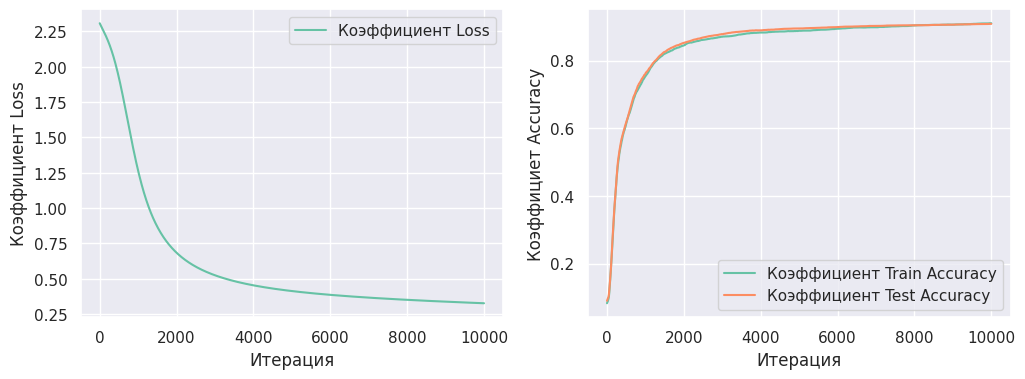

Итерация 10000/10000, Коэффициент Loss: 0.33, Коэффициент Train Accuracy: 0.91, Коэффициент Test Accuracy: 0.91
Обучение заняло 377.40 секунд.


In [19]:
start_time = time.time()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.CrossEntropyLoss()

dict = {
    "loss": [],
    "train_accuracy": [],
    "test_accuracy": [],
    "weights_layer_1": [],
    "weights_layer_2": []
}

for i in range(0, 10000):
    pred = model(train_images)

    loss = optim_func(pred, train_labels)

    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    if (i + 1) % 10 == 0 or i == 0:
        with torch.no_grad():
            dict["loss"].append(loss.item())

            prob_train = nn.functional.softmax(pred, dim=-1)
            prob_test = nn.functional.softmax(model(test_images), dim=-1)

            pred_train = torch.argmax(prob_train, dim=-1)
            pred_test = torch.argmax(prob_test, dim=-1)

            train_accuracy = (pred_train == train_labels).float().mean().item()
            test_accuracy = (pred_test == test_labels).float().mean().item()

            dict["train_accuracy"].append(train_accuracy)
            dict["test_accuracy"].append(test_accuracy)

            dict["weights_layer_1"].append((np.array(model[0].weight.detach().numpy())).T)
            dict["weights_layer_2"].append((np.array(model[2].weight.detach().numpy())).T)

            iter = list(range(0, i + 2, 10))
            clear_output(wait=True)
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(iter, dict["loss"], label="Коэффициент Loss")
            plt.xlabel("Итерация")
            plt.ylabel("Коэффициент Loss")
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(iter, dict["train_accuracy"], label="Коэффициент Train Accuracy")
            plt.plot(iter, dict["test_accuracy"], label="Коэффициент Test Accuracy")
            plt.xlabel("Итерация")
            plt.ylabel("Коэффициет Accuracy")
            plt.legend()
            plt.show()

    if (i + 1) % 100 == 0:
        print(f"Итерация {i+1}/10000, Коэффициент Loss: {loss.item():.2f}, "
              f"Коэффициент Train Accuracy: {train_accuracy:.2f}, Коэффициент Test Accuracy: {test_accuracy:.2f}")

end_time = time.time()
print(f"Обучение заняло {end_time - start_time:.2f} секунд.")


Проверьте себя, точность классификации на тестовой выборке должна быть около $90\%$. Если вы получили значительно меньший результат (менее $85\%$), попробуйте явно инициализировать веса сети и настроить разные значения learning_rate для разных параметров (посмотрите примеры с занятия). Если эти меры не помогут, то стоит поискать ошибку. Да, обучение нейронных сетей — это непростой процесс.

Так как точноcть классификации на тестовой выборке составляет 90%, то попытки настраивать веса вручную и замены learning_rates для разных параметров я считаю нецелесообразными.

In [ ]:
...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 50631d10e9d4fcecb3da59913ebde5b7 -->
**3.** Теперь самое интересное &mdash; заглянем под капот нашей нейросети!

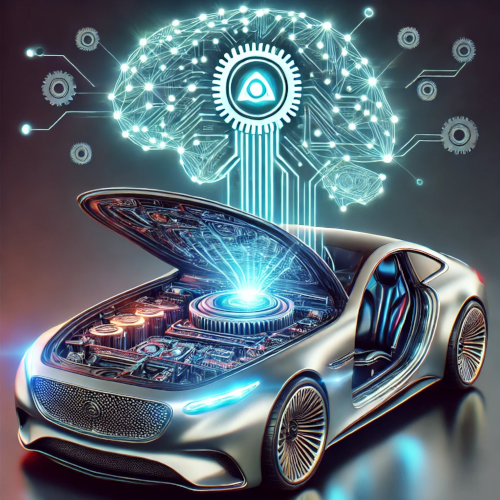

Для более глубокого понимания работы нейросети **визуализируем матрицы весов** для нескольких итераций обучения. Тем самым, вы сможете оценить, как меняется поведение модели в процессе обучения.

1. Выберите примерно 10 итераций обучения, включая первую и последнюю.
2. Для каждого слоя настройте график, используя предоставленный шаблон.

Обратите внимание, что для корректной визуализации матрицы весов ее необходимо **транспонировать**. Например, для первого слоя вертикальная ось должна соответствовать входу сети, а горизонтальная — промежуточной размерности.

В качестве цветовой палитры выбрана `"RdBu"`, что позволяет отображать положительные числа матрицы красным цветом, а отрицательные — синим. Чтобы достичь этого, также **необходимо установить параметры `vmin` и `vmax`** симметрично относительно нуля, чтобы нули отображались белым цветом. Подберите эти значения таким образом, чтобы получить наиболее четкую картинку, на которой выделяются определенные группы пикселей.

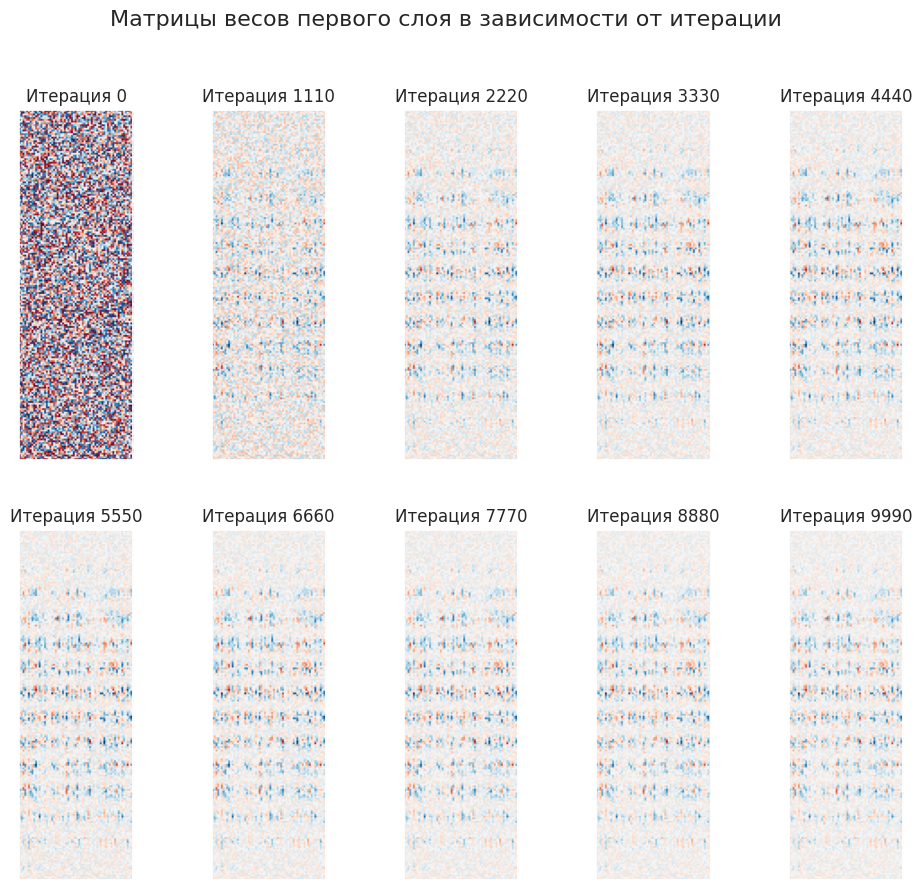

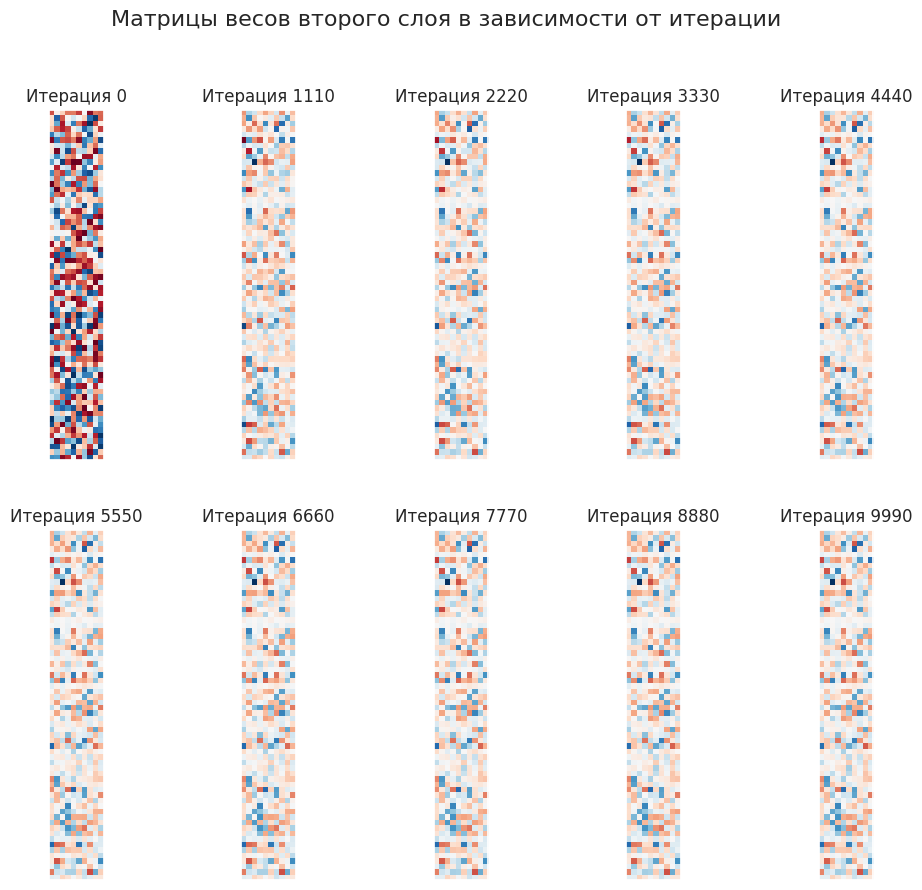

In [30]:
# Для каждого слоя

# plt.figure(figsize=(12, 10))
# for ...:  # по выбранным итерациям
#     plt.subplot(...)  # для отображения всех итераций в ряд
#     plt.imshow(..., cmap="RdBu", vmin=..., vmax=...)  # настройте vmin = -vmax
#     plt.title(...)  # укажите номер итерации
#     plt.xticks([])  # уберем координаты по x
#     plt.yticks([])  # уберем координаты по y
selected_iterations = list(range(0, 11110, 1111))

plt.figure(figsize=(12, 10))
for i, iteration in enumerate(selected_iterations):
    plt.subplot(2, 5, i + 1)
    weights = dict["weights_layer_1"][int(iteration / 10)]
    vmax = np.max(np.abs(weights))
    plt.imshow(weights, cmap="RdBu", vmin=-vmax, vmax=vmax)
    plt.title(f"Итерация {iteration}")
    plt.xticks([])
    plt.yticks([])
plt.suptitle("Матрицы весов первого слоя в зависимости от итерации", fontsize=16)
plt.show()

plt.figure(figsize=(12, 10))
for i, iteration in enumerate(selected_iterations):
    plt.subplot(2, 5, i + 1)
    weights = dict["weights_layer_2"][int(iteration / 10)]
    vmax = np.max(np.abs(weights))
    plt.imshow(weights, cmap="RdBu", vmin=-vmax, vmax=vmax)
    plt.title(f"Итерация {iteration}")
    plt.xticks([])
    plt.yticks([])
plt.suptitle("Матрицы весов второго слоя в зависимости от итерации", fontsize=16)
plt.show()

Какие выводы можно сделать, основываясь на полученных визуализациях?
Подумайте, почему на больших итерациях для первого слоя начинают выделяться определенные пиксели? Почему именно эти пиксели?

*Подсказка: вспомните, как устроены входные изображения цифр, с которыми мы работаем.*

**Ответ:**

На первом слое яркие пиксели отображают ключевые(для классификации) места изображений, по типу острых углов, сглаживаний и прочих закорючек.

На втором слое зависимость уже не настолько очев, т.к поступают на вход перераюотанные значения изображений. Но по факту, на втором слое выделяются те места, где больше всего ролял первый слой.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0db56d0ce9aedf85256c3f57f6ef20b0 -->
Попробуйте **улучшить точность классификации**, рассмотрев больше нейронов в промежуточном слое.

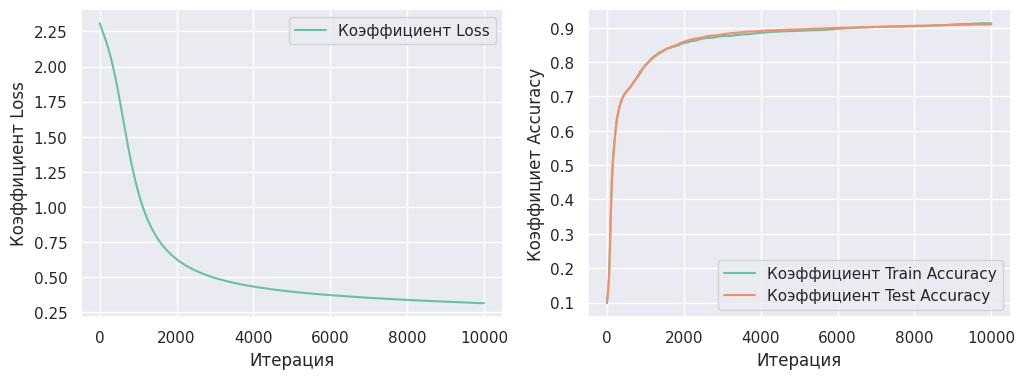

Итерация 10000/10000, Коэффициент Loss: 0.32, Коэффициент Train Accuracy: 0.91, Коэффициент Test Accuracy: 0.91
Обучение заняло 542.24 секунд.


In [34]:
# собираем модули в последовательность
model1 = nn.Sequential(
    nn.Linear(in_features=196, out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=10),
)
start_time = time.time()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)
optim_func = nn.CrossEntropyLoss()

dict = {
    "loss": [],
    "train_accuracy": [],
    "test_accuracy": [],
    "weights_layer_1": [],
    "weights_layer_2": []
}

for i in range(0, 10000):
    pred = model1(train_images)

    loss = optim_func(pred, train_labels)

    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    if (i + 1) % 10 == 0 or i == 0:
        with torch.no_grad():
            dict["loss"].append(loss.item())

            prob_train = nn.functional.softmax(pred, dim=-1)
            prob_test = nn.functional.softmax(model1(test_images), dim=-1)

            pred_train = torch.argmax(prob_train, dim=-1)
            pred_test = torch.argmax(prob_test, dim=-1)

            train_accuracy = (pred_train == train_labels).float().mean().item()
            test_accuracy = (pred_test == test_labels).float().mean().item()

            dict["train_accuracy"].append(train_accuracy)
            dict["test_accuracy"].append(test_accuracy)

            dict["weights_layer_1"].append((np.array(model1[0].weight.detach().numpy())).T)
            dict["weights_layer_2"].append((np.array(model1[2].weight.detach().numpy())).T)

            iter = list(range(0, i + 2, 10))
            clear_output(wait=True)
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(iter, dict["loss"], label="Коэффициент Loss")
            plt.xlabel("Итерация")
            plt.ylabel("Коэффициент Loss")
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(iter, dict["train_accuracy"], label="Коэффициент Train Accuracy")
            plt.plot(iter, dict["test_accuracy"], label="Коэффициент Test Accuracy")
            plt.xlabel("Итерация")
            plt.ylabel("Коэффициет Accuracy")
            plt.legend()
            plt.show()

    if (i + 1) % 100 == 0:
        print(f"Итерация {i+1}/10000, Коэффициент Loss: {loss.item():.2f}, "
              f"Коэффициент Train Accuracy: {train_accuracy:.2f}, Коэффициент Test Accuracy: {test_accuracy:.2f}")

end_time = time.time()
print(f"Обучение заняло {end_time - start_time:.2f} секунд.")

Теперь попробуйте добавить к сети еще один слой.

In [ ]:
...

Насколько дольше обучается нейросеть? Получилось ли улучшить качество?

**Ответ:**

Как мы видим, нам потребовалось ощутимо больше времени, чтобы обучить модель на 256 внутренних нейронах, однако прироста как такового к точности классификации нет. скорее всего, что это произошло из-за недостаточного изменения числа нейронов.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- b3240ec0d2bdd17c426e5b24c03277bc -->
Сделайте выводы.

**Ответ:**

по ощущениям, я не успел добавить слой и обучить модель, но добавление ещё одного слоя даст прирост к точности. Да и ощутимая прибавка к нейронам тоже должна бы работать.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---

**Мы продолжим работу с нейросетями во второй части этого домашнего задания, которую вы можете сдать на неделю позже первой.**

Вы могли заметить, что качество наших моделей было не таким высоким, как можно было бы получить современными моделями. Тем не менее отметим, что сравнивать с моделью KNN, которую мы рассмотрели на первом занятии, было бы некорректно, так как там использовалась более простая выборка.

Обучение нейронных сетей — это довольно сложная задача. Чтобы глубокие сети обучались более стабильно, используются специальные технологии, изучение которых требует больших усилий. Например, на следующей лекции мы рассмотрим сверточные слои и другие подходы к созданию и обучению нейросетей для анализа изображений.
Полное погружение в мир нейросетей, включая самые современные архитектуры, ожидает вас на третьем курсе. Например, на DS-потоке будет порядка 14 лекций по этой теме.

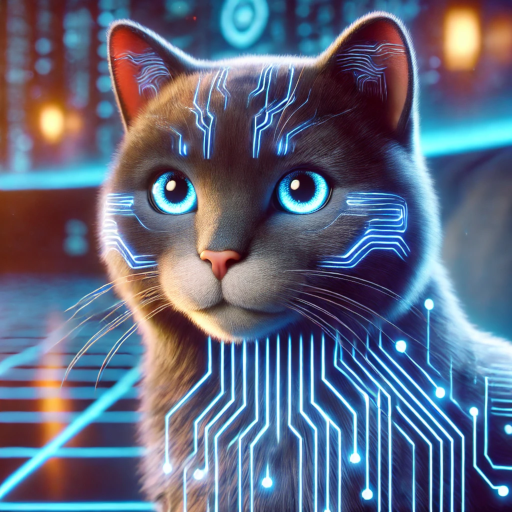